This notebook explores the expected number of core bugs under the null model.

I ran the input tidy data with:

`python src/analysis/null_core.py data/analysis_results/qvalues.mean.kruskal-wallis.case-control.txt 0.05 data/analysis_results/null_core.2_diseases.txt --n_diseases 2 --reps 100 --exclude-nonhealthy`

The `null_core.py` script takes in a table of signed q-values per dataset, shuffles each dataset's qvalues (while preserving the structure of NaN's), and recalculates the number of core bugs.

In [42]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
def plot_null(fnull, fcore, ax=None):
    """
    Plot the null core and actual core.
    """
    null = pd.read_csv(fnull, sep='\t')
    core = pd.read_csv(fcore, sep='\t', index_col=0)
    ncore = core.groupby('overall').size()

    for i in [-1, 0, 1]:
        if i not in ncore:
            ncore.loc[i] = 0
    
    order = ['health', 'mixed', 'disease']
    
    if ax is None:
        fig, ax = plt.subplots()
        
#    sns.violinplot(data=null, x='type', y='n', order=order, cut=0, ax=ax)
    sns.stripplot(data=null, x='type', y='n', order=order, jitter=True, ax=ax, alpha=0.2)
    
    ax.scatter([0, 1, 2], [ncore.loc[-1], ncore.loc[0], ncore.loc[1]], 
               c='k', marker='D', s=25, zorder=10)

    return ax

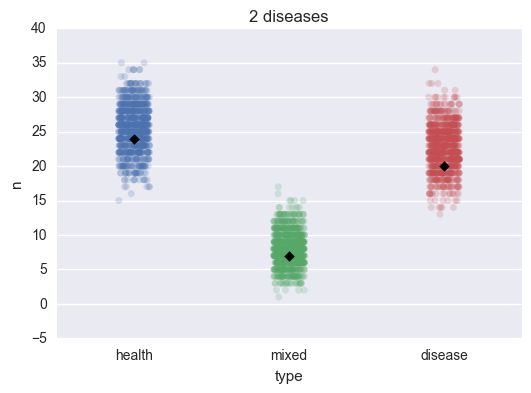

In [64]:
fnull = '../../data/analysis_results/null_core.2_diseases.txt'
fcore = '../../data/analysis_results/meta.counting.q-0.05.2_diseases.across_all_diseases.txt'

ax = plot_null(fnull, fcore)
plt.title('2 diseases')

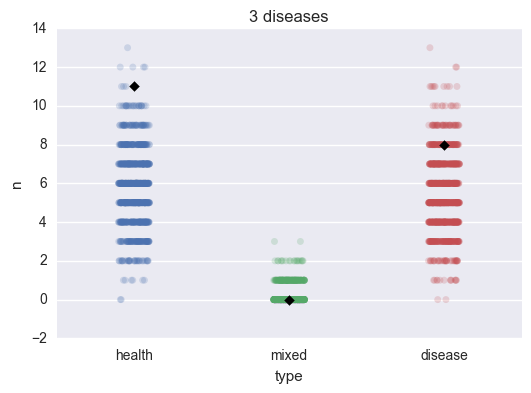

In [65]:
fnull = '../../data/analysis_results/null_core.3_diseases.txt'
fcore = '../../data/analysis_results/meta.counting.q-0.05.3_diseases.across_all_diseases.txt'

ax = plot_null(fnull, fcore)
plt.title('3 diseases')

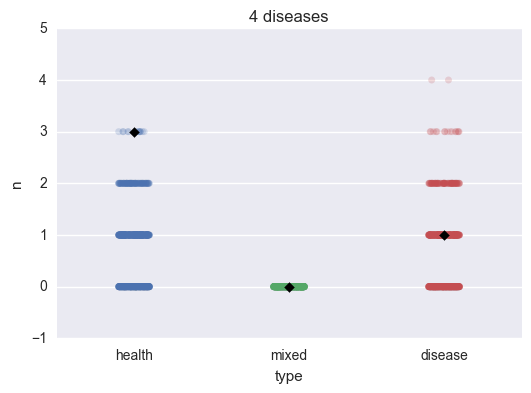

In [66]:
fnull = '../../data/analysis_results/null_core.4_diseases.txt'
fcore = '../../data/analysis_results/meta.counting.q-0.05.4_diseases.across_all_diseases.txt'

ax = plot_null(fnull, fcore)
plt.title('4 diseases')

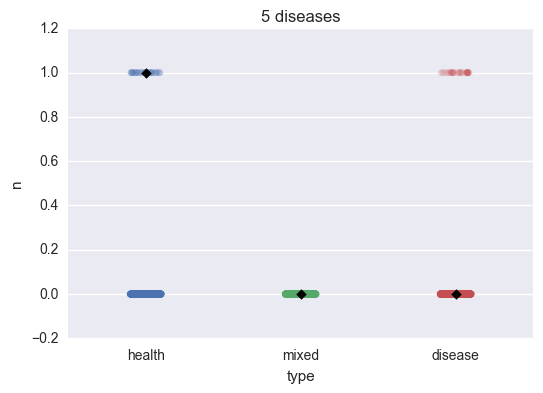

In [67]:
fnull = '../../data/analysis_results/null_core.5_diseases.txt'
fcore = '../../data/analysis_results/meta.counting.q-0.05.5_diseases.across_all_diseases.txt'

ax = plot_null(fnull, fcore)
plt.title('5 diseases')

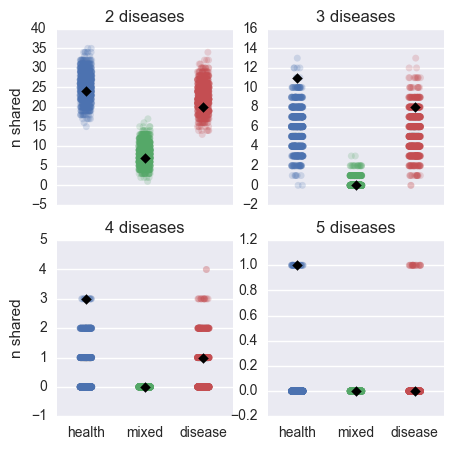

In [68]:
fig, ax = plt.subplots(2,2, figsize=(5,5))
ax = ax.flatten()
n_diseases = [2,3,4,5]
for i in range(4):
    n = n_diseases[i]
    fnull = '../../data/analysis_results/null_core.{}_diseases.txt'.format(n)
    fcore = '../../data/analysis_results/meta.counting.q-0.05.{}_diseases.across_all_diseases.txt'.format(n)
    ax[i] = plot_null(fnull, fcore, ax=ax[i])
    ax[i].set_title('{} diseases'.format(n))
    if i in [0, 1]:
        ax[i].set_xticklabels([])
    ax[i].set_xlabel('')
    if i in [1, 3]:
        ax[i].set_ylabel('')
    else:
        ax[i].set_ylabel('n shared')

In [82]:
for i in range(4):
    n = n_diseases[i]
    print('n diseases = {}'.format(n))
    fnull = '../../data/analysis_results/null_core.{}_diseases.txt'.format(n)
    fcore = '../../data/analysis_results/meta.counting.q-0.05.{}_diseases.across_all_diseases.txt'.format(n)
    null = pd.read_csv(fnull, sep='\t')
    core = pd.read_csv(fcore, sep='\t', index_col=0)
    ncore = core.groupby('overall').size()

    for i in [-1, 0, 1]:
        if i not in ncore:
            ncore.loc[i] = 0
    
    d = {'health': -1, 'mixed': 0, 'disease': 1}
    order = ['health', 'mixed', 'disease']
    
    for g in order:
        p = float(sum(null.groupby('type').get_group(g)['n'] >= ncore[d[g]])) / len(null.groupby('type').get_group(g)['n'])
        print('{}, p = {}'.format(g, p))
    
    print('')

n diseases = 2
health, p = 0.732
mixed, p = 0.725
disease, p = 0.834

n diseases = 3
health, p = 0.008
mixed, p = 1.0
disease, p = 0.15

n diseases = 4
health, p = 0.014
mixed, p = 1.0
disease, p = 0.429

n diseases = 5
health, p = 0.034
mixed, p = 1.0
disease, p = 1.0



0.034

In [75]:
ncore

overall
-1.0    1
dtype: int64